# Problem Statement

## Sentiment Analysis for drugs/medicines

Nowadays the narrative of a brand is not only built and controlled by the company that owns the brand. For this reason, companies are constantly looking out across Blogs, Forums, and other social media platforms, etc for checking the sentiment for their various products and also competitor products to learn how their brand resonates in the market. This kind of analysis helps them as part of their post-launch market research. This is relevant for a lot of industries including pharma and their drugs.
 

The challenge is that the language used in this type of content is not strictly grammatically correct. Some use sarcasm. Others cover several topics with different sentiments in one post. Other users post comments and reply and thereby indicating his/her sentiment around the topic.

Sentiment can be clubbed into 3 major buckets - Positive, Negative and Neutral Sentiments.

 

You are provided with data containing samples of text. This text can contain one or more drug mentions. Each row contains a unique combination of the text and the drug mention. Note that the same text can also have different sentiment for a different drug.

Given the text and drug name, the task is to predict the sentiment for texts contained in the test dataset. Given below is an example of text from the dataset:

 

### Example:

Stelara is still fairly new to Crohn's treatment. This is why you might not get a lot of replies. I've done some research, but most of the "time to work" answers are from Psoriasis boards. For Psoriasis, it seems to be about 4-12 weeks to reach a strong therapeutic level. The good news is, Stelara seems to be getting rave reviews from Crohn's patients. It seems to be the best med to come along since Remicade. I hope you have good success with it. My daughter was diagnosed Feb. 19/07, (13 yrs. old at the time of diagnosis), with Crohn's of the Terminal Illium. Has used Prednisone and Pentasa. Started Imuran (02/09), had an abdominal abscess (12/08). 2cm of Stricture. Started ​Remicade in Feb. 2014, along with 100mgs. of Imuran.

 

For Stelara the above text is ​positive​ while for Remicade the above text is ​negative​.

 

# Data Description

## train.csv

Contains the labelled texts with sentiment values for a given drug
 

Variable ----------	            Definition

unique_hash --------	       Unique ID

text	-------------                     text pertaining to the drugs

drug	--------------               drug name for which the sentiment is provided

sentiment ---------	        (Target) 0-positive, 1-negative, 2-neutral  



## test.csv

test.csv contains texts with drug names for which the participants are expected to predict the correct sentiment
 

## sample_submission.csv

sample_submission.csv contains the submission format for the predictions against the test set. NA single csv needs to be submitted as a solution. The submission file must contain only 2 columns <unique_hash>,<sentiment>.
 

 

# Evaluation Metric
  
The metric used for evaluating the performance of the classification model would be macro F1-Score.
 

# Public and Private Split
  
The texts in the test data are further randomly divided into Public (40%) and Private (60%) data.

In [0]:
#import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Accessing My Google Drive
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [0]:
#Read dataset
data_fileTr = "drive/My Drive/INNO_SEN_ANA/train_F3WbcTw.csv"

Train_data = pd.read_csv(data_fileTr)

#Read dataset
data_fileTs = "drive/My Drive/INNO_SEN_ANA/test_tOlRoBf.csv"

Test_data = pd.read_csv(data_fileTs)


In [0]:

#Read submission file

data_fileS = "drive/My Drive/INNO_SEN_ANA/sample_submission_i5xnIZD.csv"

Sub_data = pd.read_csv(data_fileS)

In [0]:
Train_data.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [0]:
Test_data.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


In [0]:
Sub_data.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,0
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,0
2,50b6d851bcff4f35afe354937949e9948975adf7,0
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,0
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,0


In [0]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from tensorflow.keras.utils import to_categorical

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

#this should help you to decide whether to use STOP WORDS or not.
#This part of code is just great analytical tool

stop_word = set(stopwords.words('english')) 
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word', min_df=0.001)
sparse_matrix = word_vectorizer.fit_transform(Train_data['text'])
frequencies = sum(sparse_matrix).toarray()[0]
freq = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
freq.sort_values('frequency', ascending=False)


,frequency
the,69184
and,44895
of,44701
to,44455
in,32099
for,22026
is,19979
with,19595
that,17783
it,16125


In [0]:
Train_data.sentiment.value_counts()

2    3825
1     837
0     617
Name: sentiment, dtype: int64

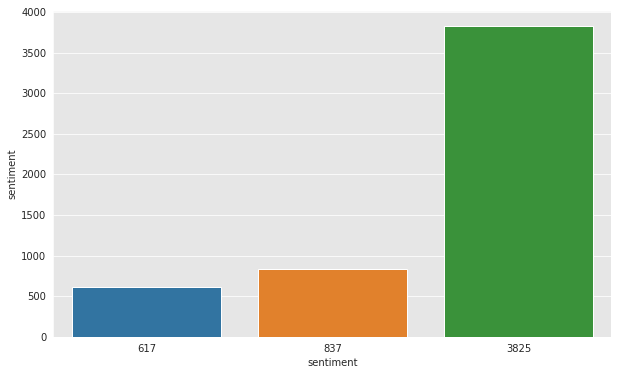

In [0]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#Visualization of data set
a = Train_data.sentiment.value_counts()
a = pd.DataFrame(a)
a['Rating'] = a.index
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y='sentiment',x='sentiment', data=a)

Text(0, 0.5, 'Number of reviews ')

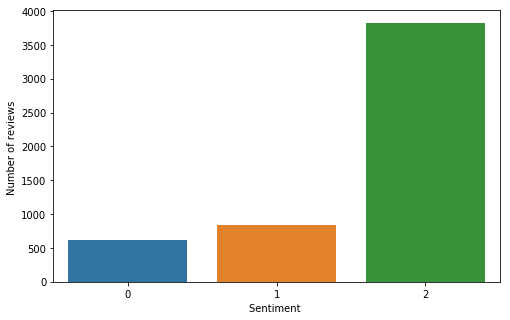

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
x = np.array(class_count.index)
y = np.array(class_count.values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

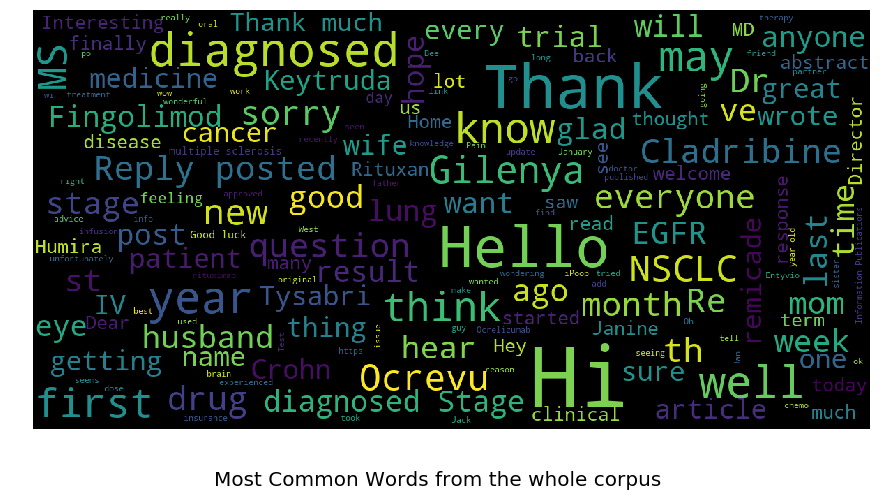

In [0]:
show_wordcloud(Train_data['text'],'Most Common Words from the whole corpus')

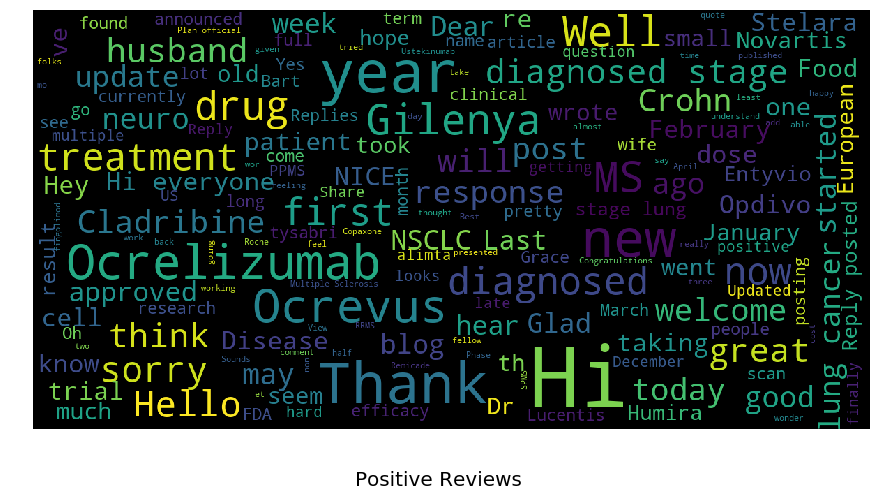

In [0]:
show_wordcloud(Train_data[Train_data['sentiment'] == 0]['text'],'Positive Reviews')

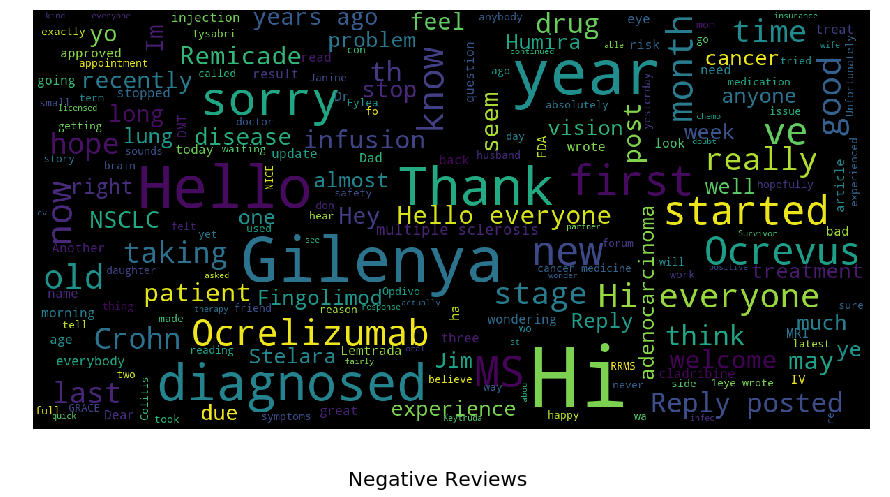

In [0]:
show_wordcloud(Train_data[Train_data['sentiment'] == 1]['text'],'Negative Reviews')

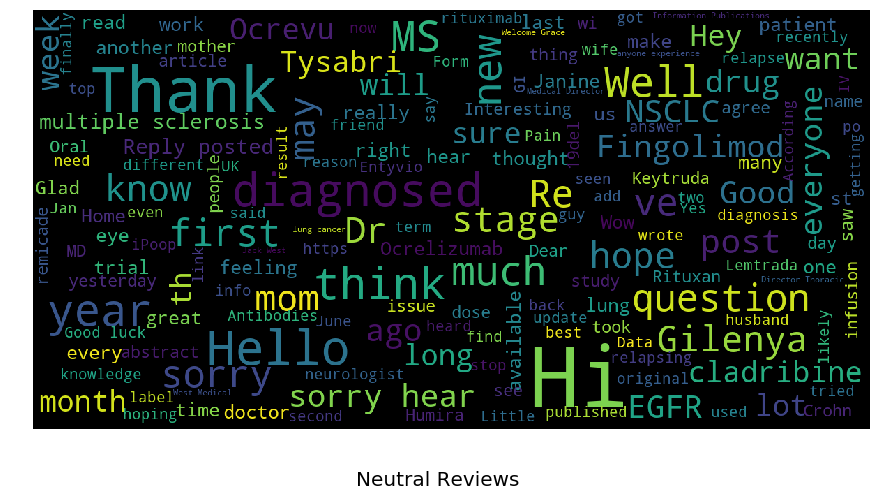

In [0]:
show_wordcloud(Train_data[Train_data['sentiment'] == 2]['text'],'Neutral Reviews')

#Data preprocessing

In [0]:
Train_data['sentiment'] = Train_data['sentiment'].apply(str)


### Load and analyse data

In [0]:
from fastai.text import *

data = (TextList.from_df(Train_data, cols='text')
                .split_by_rand_pct(0.2)
                .label_for_lm()  
                .databunch(bs=48))
data.show_batch()

idx,text
0,"risks , then that ’s great . i just think it ’s important to present this in a balanced way , and to understand why we do n’t move straight from the first show of promise in an animal study to using drugs on humans . xxmaj there ’s still a lot of animal data to gather , and human data to gather before anyone can tell if it ’s"
1,xxmaj is there any chance you could get such an appointment ? xxmaj there are risks with all the drugs ; brain disease with xxmaj tecfidera ( xxup pml ) and skin cancer with xxmaj gilenya . xxmaj hence the difficult decision ! xxmaj have a look on the xxup ms xxmaj trust website - i think that has details of all the drugs . xxmaj rachel xxbos xxmaj we
2,"of ( a lot of ) hair loss and irregular blood cell counts . xxmaj due to the relapses , i eventually changed medications . xxmaj the arrival of oral medications has been a welcome relief for many xxup ms patients . xxmaj they represent the constant advancement of research and development . xxmaj hopefully the future will bring many more options to the table . xxbos thanks for your"
3,vaccines may cause infections that can lead to very bad health problems or death if given within 6 months after birth . xxmaj how is this medicine ( xxmaj infliximab - dyyb ) best taken ? xxmaj use infliximab - dyyb as ordered by your doctor . xxmaj read all information given to you . xxmaj follow all instructions closely . xxmaj it is given as an infusion into a
4,"reason i wo n't be taking xxmaj ocrelizumab for my xxmaj progressive xxup ms if it ever becomes available . xxbos xxmaj adding to the previous comment after checking the full data presented , atrophy was measured using xxup xxunk a more sensitive xxup mri technique for this purpose than the classic xxup mri technique used in the xxmaj alemtuzumab and ocrelizumab trials . xxmaj hard to compare apples and"


In [0]:
# fit our model with train data without target values so that our model knows better about our data.


learn = language_model_learner(data,AWD_LSTM, drop_mult=0.3)

In [0]:
# select the appropriate learning rate

learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


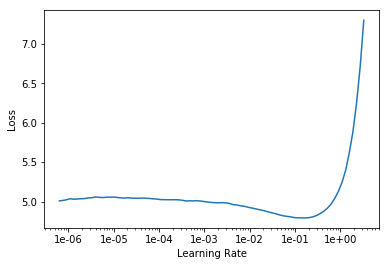

In [0]:
# we typically find the point where the slope is steepest

learn.recorder.plot()

In [0]:
# Fit the model based on selected learning rate

learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,3.706872,3.706187,0.325942,01:50
1,3.442998,3.509439,0.347056,01:50
2,3.234409,3.382052,0.366403,01:50
3,3.133446,3.299225,0.379738,01:50
4,2.911000,3.283155,0.383281,01:50


In [0]:
# Tune a little more
learn.unfreeze()
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.885102,3.224730,0.393963,02:16
1,2.764379,3.132392,0.413363,02:15
2,2.473634,3.069541,0.428197,02:16
3,2.225601,3.054540,0.438786,02:16
4,2.093765,3.070482,0.439961,02:16


In [0]:
# Save the encoder for use in classification

learn.save_encoder('fine_tuned_enc')


In [0]:
#Re-fit model with classification label

test_datalist = TextList.from_df(Test_data, cols='text', vocab=data.vocab)

data_clas = (TextList.from_df(Train_data, cols='text', vocab=data.vocab)
             .split_by_rand_pct(0.2)
             .label_from_df(cols= 'sentiment')
             .add_test(test_datalist)
             .databunch(bs=32))

data_clas.show_batch()

text,target
xxbos xxup serious xxup infections xxmaj patients treated with xxmaj remicade ® are at increased risk for developing serious infections that may lead to hospitalization or death [ see xxmaj warnings and xxmaj precautions ( 5.1 ) and xxmaj adverse xxmaj reactions ( 6.1 ) ] . xxmaj most patients who developed these infections were taking concomitant immunosuppressants such as methotrexate or corticosteroids . xxmaj remicade should be discontinued if,2
"xxbos xxmaj written xxmaj january 12 , 2018 xxmaj next : xxmaj let xxmaj us xxmaj try xxmaj home xxmaj ratings xxmaj rate this xxmaj summary xxmaj current xxmaj average xxmaj ratings xxmaj overall quality xxmaj avg : 0 / 5 xxmaj applies to topic xxmaj avg : 0 / 5 xxmaj helpful to me xxmaj avg : 0 / 5 xxmaj underwhelmed xxmaj total xxmaj avg xxmaj rating :",2
"xxbos xxmaj research xxmaj interests xxmaj my research , teaching and clinical contributions have concentrated on three areas : 1 ) cataract surgical technique and management of complications ; 2 ) refractive surgery ; and 3 ) corneal transplantation . xxup url xxunk / xxunk / xxunk xxmaj academic xxmaj distinctions 1981 – 1984 xxmaj clinical xxmaj assistant in xxmaj ophthalmology xxmaj harvard xxmaj medical xxmaj school 1983 – 1985",2
"xxbos xxmaj the lungs are a pair of cone - shaped breathing organs in the chest . xxmaj the lungs bring oxygen into the body as you breathe in . xxmaj they release carbon dioxide , a waste product of the body ’s cells , as you breathe out . xxmaj each lung has sections called lobes . xxmaj the left lung has two lobes . xxmaj the right lung",2
"xxbos xxmaj the lungs are a pair of cone - shaped breathing organs in the chest . xxmaj the lungs bring oxygen into the body as you breathe in . xxmaj they release carbon dioxide , a waste product of the body ’s cells , as you breathe out . xxmaj each lung has sections called lobes . xxmaj the left lung has two lobes . xxmaj the right lung",2


In [0]:
#predict the target values and compare with original target values.

learn_classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

# load the encoder saved  

learn_classifier.load_encoder('fine_tuned_enc')
learn_classifier.freeze()

In [0]:
# select the appropriate learning rate

learn_classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


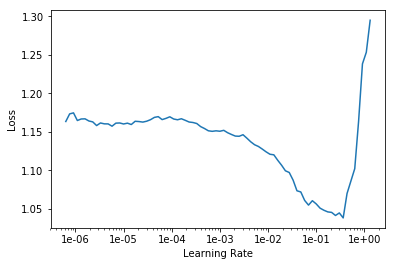

In [0]:
# we typically find the point where the slope is steepest

learn_classifier.recorder.plot()


In [0]:
# Fit the model based on selected learning rate


learn_classifier.fit_one_cycle(5, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.782261,0.772424,0.681517,01:09
1,0.736765,0.707708,0.728910,01:09
2,0.691617,0.813878,0.727014,01:09
3,0.683472,0.779570,0.730806,01:08
4,0.676182,0.773798,0.722275,01:08


In [0]:
# Tune a little more

learn_classifier.freeze_to(-2)
learn_classifier.fit_one_cycle(5, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.683764,0.829506,0.720379,01:14
1,0.670927,0.755073,0.713744,01:15
2,0.640266,0.735715,0.730806,01:15
3,0.556829,0.737575,0.712796,01:13
4,0.463173,0.753294,0.716588,01:15


In [0]:
# Tune a little more

learn_classifier.freeze_to(-3)
learn_classifier.fit_one_cycle(5, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,0.475032,0.762340,0.722275,01:36
1,0.490793,0.807928,0.701422,01:34
2,0.380805,0.865754,0.735545,01:34
3,0.256164,0.915482,0.741232,01:37
4,0.190902,0.977394,0.729858,01:36


In [0]:
learn_classifier.show_results()


text,target,prediction
"xxbos xxmaj l-3,5,5’-tetraiodothyronine ( … xxup xxunk - truh - i - oh - doh - xxup thy - roh - xxunk ) a hormone that is made by the thyroid gland and contains iodine . xxmaj l-3,5,5’-tetraiodothyronine increases the rate of chemical reactions in cells and helps control growth and development . xxmaj l-3,5,5’-tetraiodothyronine can also be made in the laboratory and is used to treat thyroid disorders .",2,2
xxbos xxmaj childhood rhabdomyosarcoma is a disease in which malignant ( cancer ) cells form in muscle tissue . xxmaj certain genetic conditions increase the risk of childhood rhabdomyosarcoma . a sign of childhood rhabdomyosarcoma is a lump or swelling that keeps getting bigger . xxmaj diagnostic tests and a biopsy are used to detect ( find ) and diagnose childhood rhabdomyosarcoma . xxmaj certain factors affect prognosis ( chance,2,2
"xxbos ( in xxup xxunk e mab ) xxmaj index xxmaj terms xxmaj xxunk xxmaj infliximab , xxmaj recombinant xxmaj infliximab - abda xxmaj infliximab - dyyb xxmaj infliximab - qbtx xxmaj ixifi xxmaj dosage xxmaj forms xxmaj excipient information presented when available ( limited , particularly for generics ) ; consult specific product labeling . xxmaj solution xxmaj reconstituted , xxmaj intravenous : xxmaj inflectra : infliximab - dyyb",2,2
"xxbos xxmaj last xxmaj updated : xxmaj january 01 , 2017 . xxmaj share | xxmaj comments : ( 0 ) xxmaj tell - a - xxmaj friend xxmaj here are what the editors at healthday consider to be the most important developments in xxmaj pharmacy for xxmaj december 2016 . xxmaj this roundup includes the latest research news from journal articles , as well as the xxup fda approvals",0,0
"xxbos xxmaj life with xxmaj graft vs. xxmaj host xxmaj disease ( xxup gvhd ) xxmaj post xxmaj allogeneic xxmaj stem xxmaj cell or xxmaj bone xxmaj marrow xxmaj transplantation : xxmaj new xxmaj treatment xxmaj approaches , xxmaj dec 13 , 2018 xxmaj xxunk xxmaj lung xxmaj cancer xxmaj for xxmaj caregivers : xxmaj practical xxmaj tips for xxmaj coping with xxmaj your xxmaj loved xxmaj one ’s xxmaj",2,2


### Get Prediction


In [0]:
preds, target = learn_classifier.get_preds(DatasetType.Test, ordered=True)
labels = np.argmax(preds, axis =1)

### Submission

In [0]:
submission = pd.DataFrame({'unique_hash': Test_data["unique_hash"], 'sentiment': labels})
submission.to_csv('learn_8.csv', index=False)
submission.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [0]:
submission.sentiment.value_counts()
from google.colab import files

files.download("learn_8.csv") 

In [0]:
############################################################################